# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

## Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

## Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic regression model on the training data.
- Check the accuracy on the test data.
Note: So far we have not balanced the data.

## Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [43]:
# To make run all you ask in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [44]:
churndata = pd.read_csv('Customer-Churn.csv')

In [45]:
churndata.head()
churndata.shape

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


(7043, 16)

In [46]:
rows = churndata.shape[0]
columns = churndata.shape[1]
print("The train churndataset contains {0} rows and {1} columns.\n".format(rows, columns))
churndata_info= pd.DataFrame({"dtype": churndata.dtypes, "unique": churndata.nunique(), "missing%": (churndata.isnull().sum()/churndata.shape[0])*100})

churndata_describe = churndata.describe().T
churndata_describe = churndata_describe.drop(['count','min','25%','50%','75%','max'],axis=1)


churndata_info= pd.concat((churndata_info, churndata_describe), axis= 1)
churndata_info = churndata_info.T

churndata_info

churndata_song = churndata.select_dtypes(include='object')

churndata_quantiles = churndata.describe().T
churndata_quantiles = churndata_quantiles.drop(['count','mean','std'],axis=1)
churndata_quantiles.T
churndata.describe(include='object').T

The train churndataset contains 7043 rows and 16 columns.



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
dtype,object,int64,object,object,int64,object,object,object,object,object,object,object,object,float64,object,object
unique,2,2,2,2,73,2,3,3,3,3,3,3,3,1585,6531,2
missing%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,NaN,0.162147,NaN,NaN,32.3711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.7617,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.5595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.09,NaN,NaN


,SeniorCitizen,tenure,MonthlyCharges
min,0.0,0.0,18.25
25%,0.0,9.0,35.50
50%,0.0,29.0,70.35
75%,0.0,55.0,89.85
max,1.0,72.0,118.75


,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473
StreamingTV,7043,3,No,2810
StreamingMovies,7043,3,No,2785


In [47]:
s = pd.Series(churndata['TotalCharges'])

s.isna().sum()

0

In [48]:
def clean_spac(row):
    return row.replace(" ","")
churndata['TotalCharges'] = list(map(clean_spac,churndata['TotalCharges']))
churndata['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [49]:
churndata['TotalCharges'] = pd.to_numeric(s,downcast = 'float')
churndata['SeniorCitizen'] =churndata['SeniorCitizen'].astype('object')
churndata['TotalCharges'].isna().sum()

11

In [50]:
churndata_info= pd.DataFrame({"dtype": churndata.dtypes, "unique": churndata.nunique(), "missing%": (churndata.isnull().sum()/churndata.shape[0])*100})
churndata_info

,dtype,unique,missing%
gender,object,2,0.000000
SeniorCitizen,object,2,0.000000
Partner,object,2,0.000000
Dependents,object,2,0.000000
tenure,int64,73,0.000000
PhoneService,object,2,0.000000
OnlineSecurity,object,3,0.000000
OnlineBackup,object,3,0.000000
DeviceProtection,object,3,0.000000
TechSupport,object,3,0.000000


C:\Users\Jacqu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

<function matplotlib.pyplot.show(close=None, block=None)>

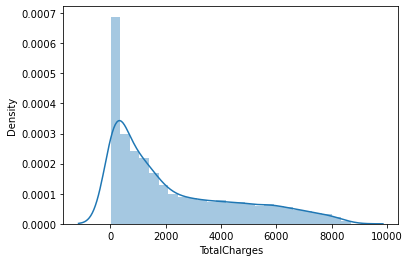

In [51]:
sns.distplot(churndata['TotalCharges'])
plt.show

In [52]:
churndata['TotalCharges'] = churndata['TotalCharges'].fillna(np.mean(churndata['TotalCharges']))

In [53]:
churndata_info= pd.DataFrame({"dtype": churndata.dtypes, "unique": churndata.nunique(), "missing%": (churndata.isnull().sum()/churndata.shape[0])*100})
churndata_info

,dtype,unique,missing%
gender,object,2,0.0
SeniorCitizen,object,2,0.0
Partner,object,2,0.0
Dependents,object,2,0.0
tenure,int64,73,0.0
PhoneService,object,2,0.0
OnlineSecurity,object,3,0.0
OnlineBackup,object,3,0.0
DeviceProtection,object,3,0.0
TechSupport,object,3,0.0


C:\Users\Jacqu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

<function matplotlib.pyplot.show(close=None, block=None)>

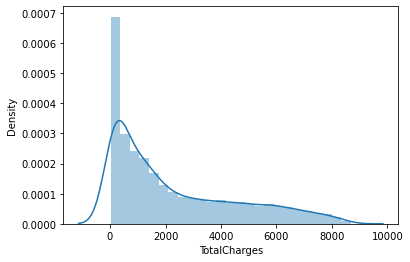

In [54]:
sns.distplot(churndata['TotalCharges'])
plt.show

In [55]:
numerical = churndata.select_dtypes(np.number)
categorical = churndata.select_dtypes(include = 'object')

In [56]:
#categorical = pd.get_dummies(categorical, drop_first = True)

In [57]:
churn = categorical['Churn']
senior = categorical['SeniorCitizen']


In [58]:
data = pd.concat((numerical,senior,churn), axis=1)
data

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
0,1,29.85,29.850000,0,No
1,34,56.95,1889.500000,0,No
2,2,53.85,108.150002,0,Yes
3,45,42.30,1840.750000,0,No
4,2,70.70,151.649994,0,Yes
...,...,...,...,...,...
7038,24,84.80,1990.500000,0,No
7039,72,103.20,7362.899902,0,No
7040,11,29.60,346.450012,0,No
7041,4,74.40,306.600006,1,Yes


In [96]:
X = data.drop(['Churn'], axis = 1)
y = data['Churn']

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

In [98]:
X

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,29.85,29.850000,0
1,34,56.95,1889.500000,0
2,2,53.85,108.150002,0
3,45,42.30,1840.750000,0
4,2,70.70,151.649994,0
...,...,...,...,...
7038,24,84.80,1990.500000,0
7039,72,103.20,7362.899902,0
7040,11,29.60,346.450012,0
7041,4,74.40,306.600006,1


In [99]:
X_train
y_train

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
5066,44,54.30,2390.449951,0
390,27,95.60,2595.250000,0
1007,2,68.95,119.750000,0
5087,2,20.35,41.849998,0
2939,12,83.80,1029.750000,1
...,...,...,...,...
79,45,25.90,1216.599976,0
3927,3,20.55,51.150002,0
5955,72,68.40,4855.350098,0
6936,5,80.15,385.000000,0


5066     No
390      No
1007    Yes
5087     No
2939    Yes
       ... 
79       No
3927    Yes
5955     No
6936    Yes
5640    Yes
Name: Churn, Length: 5634, dtype: object

In [100]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_train)
X_scaled = pd.DataFrame(transformer.transform(X_train),columns=X_train.columns)
X_scaled.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,0.472016,-0.338701,0.048302,-0.439475
1,-0.219704,1.030607,0.138969,-0.439475
2,-1.236939,0.147022,-0.956965,-0.439475
3,-1.236939,-1.464319,-0.991452,-0.439475
4,-0.830045,0.639376,-0.554097,2.275441


In [101]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.7814052519517388

In [102]:
y_test.value_counts()

No     1025
Yes     384
Name: Churn, dtype: int64

In [103]:
y_train

5066     No
390      No
1007    Yes
5087     No
2939    Yes
       ... 
79       No
3927    Yes
5955     No
6936    Yes
5640    Yes
Name: Churn, Length: 5634, dtype: object

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()

# need to randomize X and y, but together
#churndata = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
#churndata.columns = [0,1,2,3,'y']
#churndata = churndata.sample(frac=1)
#churndata.head()
#X=np.array(churndata.loc[:, churndata.columns != 'y'])
#y=np.array(churndata['y'])

scores = cross_val_score(model, X_scaled, y_train, cv=10)
scores

array([0.71099291, 0.68794326, 0.7677305 , 0.68617021, 0.76909414,
       0.72824156, 0.72646536, 0.72824156, 0.69804618, 0.72468917])

In [105]:
mean_score = scores.mean()

In [106]:
print(X_scaled.shape)
print(y_train.shape)

(5634, 4)
(5634,)


In [107]:
from sklearn.neighbors import KNeighborsClassifier
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()


#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_scaled, y_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.7232893062746432, 'Logistic Regression': 0.7932173765163826, 'KNN': 0.7793762518423341}


In [108]:
val_scores = {}
i=0
for model in model_pipeline:
    model.fit(X_train, y_train)
    val_scores[model_names[i]] = model.score(X_test,y_test)
    i = i+1
print(val_scores)

DecisionTreeClassifier()

LogisticRegression()

KNeighborsClassifier()

{'Classification Tree': 0.7189496096522356, 'Logistic Regression': 0.7814052519517388, 'KNN': 0.7714691270404542}


In [109]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20,
                             min_samples_split=10,
                             min_samples_leaf =10)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10)

0.8349307774227902
0.7778566359119943


In [111]:
y_test.value_counts()

No     1025
Yes     384
Name: Churn, dtype: int64

In [72]:
churn_yes = data[data['Churn'] == 'Yes']
churn_no = data[data['Churn'] == 'No']

In [73]:
churn_no

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
0,1,29.85,29.850000,0,No
1,34,56.95,1889.500000,0,No
3,45,42.30,1840.750000,0,No
6,22,89.10,1949.400024,0,No
7,10,29.75,301.899994,0,No
...,...,...,...,...,...
7037,72,21.15,1419.400024,0,No
7038,24,84.80,1990.500000,0,No
7039,72,103.20,7362.899902,0,No
7040,11,29.60,346.450012,0,No


In [74]:
churn_yes_oversampled = resample(churn_yes, 
                                  replace=True, 
                                  n_samples = len(churn_no))

In [75]:
churn_yes_upsampled = pd.concat([churn_no, churn_yes_oversampled], axis=0)

In [91]:
X = churn_yes_upsampled.drop(['Churn'],axis=1)
y = churn_yes_upsampled['Churn']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

In [93]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20,
                             min_samples_split=10,
                             min_samples_leaf =10)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10)

0.8464604977047596
0.7951690821256039


In [94]:
y_test.value_counts()

Yes    1047
No     1023
Name: Churn, dtype: int64

In [95]:
# For cross validation
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=10,
                             min_samples_split=20,
                             min_samples_leaf =20)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.7673323052298922
